In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import time
import shutil
import random
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.utils import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
import tensorflow as tf
from tensorflow.keras.applications import resnet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
print("Tensorflow version " + tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, accuracy_score

from mlxtend.plotting import plot_confusion_matrix

Tensorflow version 2.8.2


In [4]:
from google.colab.patches import cv2_imshow
import cv2
from keras.models import load_model

In [5]:
#model = load_model("/content/drive/MyDrive/FinalProject_AdvancedCV/Model/ResNet50/ResNet50.h5")
model = load_model("/content/drive/MyDrive/FinalProject_AdvancedCV/Model/VGG16/VGG16.h5")

(1980, 2640, 3) 132.0 176.0


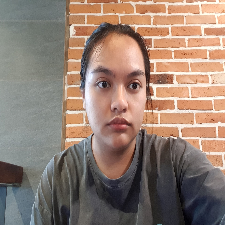

In [11]:
#path = "/content/drive/MyDrive/FinalProject_AdvancedCV/Image Test/0_100.jpg"
#path = "/content/drive/MyDrive/FinalProject_AdvancedCV/Image Test/1_0.jpg"
#path = "/content/drive/MyDrive/FinalProject_AdvancedCV/Image Test/2_19.jpg"
#path = "/content/drive/MyDrive/FinalProject_AdvancedCV/Image Test/3_146.jpg"
#path = "/content/drive/MyDrive/FinalProject_AdvancedCV/Image Test/4_28.jpg"
#path = "/content/drive/MyDrive/FinalProject_AdvancedCV/Image Test/5_128.jpg"
path = "/content/drive/MyDrive/FinalProject_AdvancedCV/Image Test/6_384.jpg"
#path = "/content/drive/MyDrive/FinalProject_AdvancedCV/Image Test/People/Happy.jpg"
#path = "/content/drive/MyDrive/FinalProject_AdvancedCV/Image Test/People/people3.jpg"
#path = "/content/drive/MyDrive/FinalProject_AdvancedCV/Image Test/People/people5.jpg"
original_image = cv2.imread(path)
original = cv2.imread(path)
image = cv2.resize(original_image,(225,225))
x_min = original.shape[0]/15
y_min = original.shape[1]/15
print(original_image.shape,x_min,y_min)
box_thickness = 2
line_thickness = 1
if (original.shape[0] > 500 and original.shape[0] < 1000):
    box_thickness = 4
    line_thickness = 2
elif (original.shape[0] > 1000 and original.shape[0] < 1500):
    box_thickness = 6
    line_thickness = 3
elif (original.shape[0] > 1500):
    box_thickness = 10
    line_thickness = 5
cv2_imshow(image)

In [9]:
#setting image resizing parameters
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

#loading image
gray = cv2.cvtColor(original_image,cv2.COLOR_RGB2GRAY)
face = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face.detectMultiScale(gray, scaleFactor  = 1.05,minNeighbors =  6, minSize = (int(x_min), int(y_min)))

emotion = ""

#detecting faces
for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(cv2.resize(roi_gray, (48, 48)), 0)
        rgb_cropped_img = np.repeat(cropped_img[..., np.newaxis], 3, -1)
        rgb_cropped_img = rgb_cropped_img/255.
        cv2.rectangle(original_image,  (x, y), (x + w, y + h), (255, 0, 0), box_thickness)
        #predicting the emotion
        pred= model.predict(rgb_cropped_img)
        cv2.putText(original_image, labels[(np.argmax(pred))] + " : " + str(np.amax(pred)) , (x, y), cv2.FONT_HERSHEY_SIMPLEX, line_thickness, (255, 255, 0), line_thickness, cv2.LINE_AA)
        emotion = labels[(np.argmax(pred))]
        print(pred)
        print("Emotion: "+labels[(np.argmax(pred))] + " : " + str((np.amax(pred))*100) +"%")

[[7.7154115e-02 1.5618103e-05 2.4369914e-02 2.0274155e-04 7.4091919e-02
  3.7794118e-04 8.2378781e-01]]
Emotion: Neutral : 82.37878084182739%


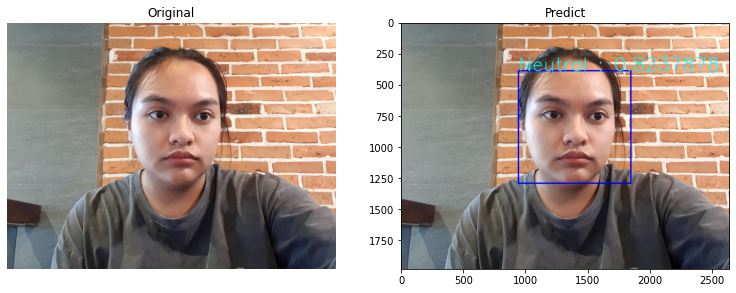

In [10]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,3,1)
plt.title('Original')
plt.axis('off')
ax1.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))

ax2 = fig.add_subplot(1,3,2)
plt.title('Predict')
ax2.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

plt.show()